# Chapter: Machine Learning-based Dynamic Modeling: Workflow and Best Practices

## Topic: Remove noise from time-series signal

In [1]:
# import packages 
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 12})
np.random.seed(1)

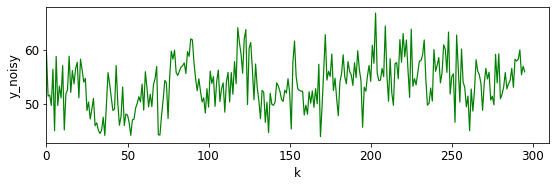

In [5]:
# read data
y_noisy = np.loadtxt('noisySignal.csv', delimiter=',')

# plot
plt.figure(figsize=(9,2.5))
plt.plot(y_noisy, 'g', linewidth=1.2)
plt.ylabel('y_noisy'), plt.xlabel('k'), plt.xlim(0)
plt.show()

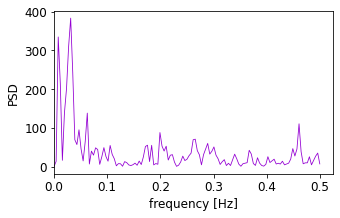

In [6]:
#%% generate PSD plot
freq, PSD = signal.welch(y_noisy)

plt.figure(figsize=(5,3)), plt.plot(freq, PSD, 'darkviolet', linewidth=0.8)
plt.ylabel('PSD'), plt.xlabel('frequency [Hz]'), plt.xlim(0)
plt.show()

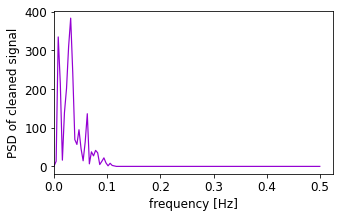

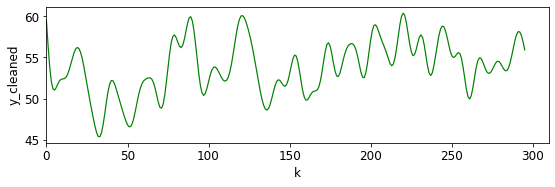

In [10]:
# apply butterworth filter
b, a = signal.butter(5, 0.2, 'low') # create the filter
y_cleaned = signal.filtfilt(b, a, y_noisy) # apply filter

# PSD plot of cleaned signal
freq, PSD = signal.welch(y_cleaned)
plt.figure(figsize=(5,3)), plt.plot(freq, PSD, 'darkviolet', linewidth=1.2)
plt.ylabel('PSD of cleaned signal'), plt.xlabel('frequency [Hz]'), plt.xlim(0)

# plot cleaned signal
plt.figure(figsize=(9,2.5))
plt.plot(y_cleaned, 'g', linewidth=1.2)
plt.ylabel('y_cleaned'), plt.xlabel('k'), plt.xlim(0)
plt.show()